In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer,HashingVectorizer

In [ ]:
## Reading the data and removing columns that are not important. 
df = pd.read_csv('data_cleaned_version_1.csv', sep = ',', encoding = 'latin-1')
df.head(5)

,Unnamed: 0,userid,username,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
0,0,313480107,chavez145,939,577,69258,2011-06-08 18:31:50,2022-02-28 00:07:06,642,â¡ï¸New York State Governor Kathy Hokul (Dem...,"[{'text': 'Russia', 'indices': [132, 139]}]",en,0
1,1,2170195636,d7xen,1631,214,1630,2013-11-06 01:34:15,2022-02-28 00:07:07,6,Closer look at the Vasylkiv oil depot fire whi...,"[{'text': 'osint', 'indices': [118, 124]}, {'t...",en,0
2,2,2324486774,GayEqualGlobal,34037,34867,267610,2014-02-02 23:23:52,2022-02-28 00:07:07,1501,#Russia's state media is flipping out over our...,"[{'text': 'Russia', 'indices': [20, 27]}]",en,0
3,3,2544474997,Jmltrouille,1586,1429,28390,2014-06-03 22:19:12,2022-02-28 00:07:08,3,Ukrainian National Anthem with English transla...,"[{'text': 'Ukraine', 'indices': [104, 112]}, {...",en,0
4,4,991781656808886272,Akan__Drama,1095,1036,22392,2018-05-02 20:49:08,2022-02-28 00:07:08,128,JUST IN: Ukraine opens global recruitment prog...,[],en,0


In [ ]:
#Remove the data that the text language is not English
df = df.drop(df[df['language']!="en"].index)
#Test on the first 10000 rows
df = df.loc[1:10000]

In [ ]:
import re
from bs4 import BeautifulSoup
from html import unescape
#Remove URLS
def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

In [ ]:
#Unescape characters
def unescape_stuff(x):
    soup = BeautifulSoup(unescape(x), 'lxml')
    return soup.text

In [ ]:
#Remove emojis
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
#Replace conservative whitespaces
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [ ]:
#Remove unwanted symbols
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string  

In [ ]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(unescape_stuff)
df['text'] = df['text'].apply(deEmojify)
df['text'] = df['text'].apply(remove_symbols)
df['text'] = df['text'].apply(unify_whitespaces)

In [ ]:
df['text'].head()

1    closer look at the vasylkiv oil depot fire whi...
2     russia s state media is flipping out over our...
3    ukrainian national anthem with english transla...
4    just in ukraine opens global recruitment progr...
5    trump, the gop, the republicans, and the nra h...
Name: text, dtype: object

In [ ]:
#Transform the words in the text to word frequency matrix
vectorizer = CountVectorizer()
#Calculate tf-idf of each word
transformer = TfidfTransformer()
#Transform texts to word frequency matrix
tfidf = transformer.fit_transform(vectorizer.fit_transform(df["text"]))

#Get all the words
word = vectorizer.get_feature_names()
#Get tf-idf from the matrix
weight = tfidf.toarray()
num = np.array(weight)  
#Number of word lists
print(num.shape[1])


21532


In [ ]:
from sklearn.cluster import KMeans
#Cluster to 3 classes
clf = KMeans(n_clusters=3) 
s=clf.fit(weight) 
print(s)         
#Cluster center
print(len(clf.cluster_centers_))

KMeans(n_clusters=3)
3


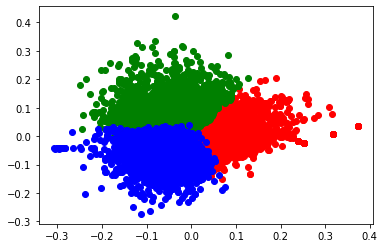

In [ ]:
listlabel=[]
i=0
while i<len(clf.labels_):
    listlabel.append([i,clf.labels_[i]])
    i=i+1

frame = pd.DataFrame(listlabel,columns=['index','class'])


list0=[]                                                
data0=frame[(frame[u'class']==0)].iloc[:,0]
for m in data0:
    list0.append(m)

list1=[]
data1=frame[(frame[u'class']==1)].iloc[:,0]
for m in data1:
    list1.append(m)

list2=[]
data2=frame[(frame[u'class']==2)].iloc[:,0]
for m in data2:
    list2.append(m)



# Dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
newData = pca.fit_transform(weight)


#Class 1
x1=[]          
y1=[]        
for j in list0:
    x1.append(newData[j][0])
    y1.append(newData[j][1])

#Class 2
x2 = []
y2 = []
for j in list1:
    x2.append(newData[j][0])
    y2.append(newData[j][1])

#Class 3
x3 = []
y3 = []
for j in list2:
    x3.append(newData[j][0])
    y3.append(newData[j][1])



#Visualization
plt.plot(x1, y1, 'or')
plt.plot(x2, y2, 'og')
plt.plot(x3, y3, 'ob')

plt.show()

In [ ]:
print(len(frame[frame['class']==0]))
print(len(frame[frame['class']==1]))
print(len(frame[frame['class']==2]))

4211
2651
3092


In [ ]:
print(frame)

      index  class
0         0      0
1         1      2
2         2      0
3         3      0
4         4      2
...     ...    ...
9949   9949      2
9950   9950      1
9951   9951      0
9952   9952      0
9953   9953      0

[9954 rows x 2 columns]


In [ ]:
frame = frame[['class']]

In [ ]:
frame.to_csv("labels.csv", sep='\t', encoding='utf-8')